**<font size='6' color='red'> ch1. NLTK 자연어 처리 패키지 </font>**
# 1. NLTK 패키지
1. 텍스트 전처리 : 정규표현식을 활용한 토큰화, 토큰화(어절, 문장 나누기), 불용어제거, 기본형(어근)추출
2. 품사태깅 : 단어 품사식별
3. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감성분석... (단점)NLTK 속도가 느림

In [2]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to d:\nltk_data...


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:40])

[Emma by Jane Austen 1816]

VOLUME I

CH


In [8]:
len(emma)

887071

In [5]:
# sent_tokenize() : 문장단위로 쪼갠 list
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('첫문장 : %r'%(sent_tokens[0]))
print('두번째문장 : %r'%(sent_tokens[1]))
print('문장수 :',len(sent_tokens))

첫문장 : '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'
두번째문장 : "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."
문장수 : 7456


In [14]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [15]:
# RegexpTokenizer클래스 : 토큰화할 때 정규표현식 이용
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\w+')
words = ret.tokenize(sent_tokens[0])
print(words)

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미있는 가장 작은 말의 단위) 분석
- 자연어처리의 기본은 형태소 분석과 품사태깅
    * 어간추출(stemming), 원형복원(lemmatizing), 품사 태깅

In [16]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간 추출(1)
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2])

('send', 'cook', 'file')

In [17]:
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [18]:
# 어간 추출(2) - ※
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [19]:
# 어간 추출(3)
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [20]:
# 어간을 추출할 경우 의미가 달라지는 경우 있어 원형복원을 하기도 함
words2 = ['belives', 'cooking']
[lst.stem(word) for word in words2]

['bel', 'cook']

In [23]:
# 원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belives', 'cooking']

In [25]:
# 품사태깅 : sent_tokens[10]
from nltk.tag import pos_tag
words = word_tokenize(sent_tokens[10])
tagged_list = pos_tag(words)
print('단어들 :', words)
print('\n 품사태깅결과 :', tagged_list)

단어들 : ['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']

 품사태깅결과 : [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


In [116]:
# 퀴즈 : emma 소설안에서
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사 태깅을 하시오.
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
import pandas as pd
rtn = RegexpTokenizer('[\w]{3,}')
words = []
for pro in sent_tokens:
    words.append(rtn.tokenize(pro))
taggin_words = [pos_tag(word) for word in words]

In [117]:
cnt=0
for row in emma:
    cnt += len(row)
print(cnt)

887071


In [124]:
set_tag = set()
for tags in taggin_words:
    for tag in tags:
        set_tag.add(tag)

In [135]:
print('emma소설의 글자수 {}, 단어 출현수 {}, 단어종류수 {}'.format(len(emma), len(words), len(set_tag)))
taggin_words[0][:10]

emma소설의 글자수 887071, 단어 출현수 7456, 단어종류수 11543


[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN')]

In [48]:
# 2. Emma 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
tag_list = []
for words in taggin_words:
    for word in words:
        if word[0] != 'Emma':
            continue
        else:
            tag_list.append(word[1])

865


In [52]:
tag_val_cnt = pd.DataFrame(tag_list).value_counts()
print('Emma단어는 총 {}번 등장합니다'.format(len(tag_list)))
for idx, cnt in zip(tag_val_cnt.index, tag_val_cnt):
    print('{}태그의 출현 갯수는 {}개 입니다'.format(idx[0], cnt))

Emma단어는 총 865번 등장합니다
NNP태그의 출현 갯수는 811개 입니다
NN태그의 출현 갯수는 35개 입니다
JJ태그의 출현 갯수는 4개 입니다
NNS태그의 출현 갯수는 4개 입니다
VB태그의 출현 갯수는 4개 입니다
VBP태그의 출현 갯수는 3개 입니다
RB태그의 출현 갯수는 2개 입니다
NNPS태그의 출현 갯수는 1개 입니다
VBD태그의 출현 갯수는 1개 입니다


In [79]:
# 3. 내가 원하는 품사 (명사 : NN, NNS, NNP, NNPS)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오
word_list = []
noun_list = []
for words in taggin_words:
    for word in words:
        if word[1] != 'NN' and word[1] != 'NNS' and word[1] != 'NNP' and word[1] != 'NNPS':
            continue
        else :
            word_list.append(word[0])
            noun_list.append(word)

In [93]:
noun_df = pd.DataFrame(noun_list)

In [114]:
print('명사가 나온 횟수 :', noun_cnt.sum())
print('출력한 명사의 수(반복제거) :', noun_cnt.index.value_counts().sum())
print('한단어가 나오는 평균 빈도수 :',noun_cnt.groupby(0).sum().mean())

명사가 나온 횟수 : 30953
출력한 명사의 수(반복제거) : 4328
한단어가 나오는 평균 빈도수 : 7.431692677070829


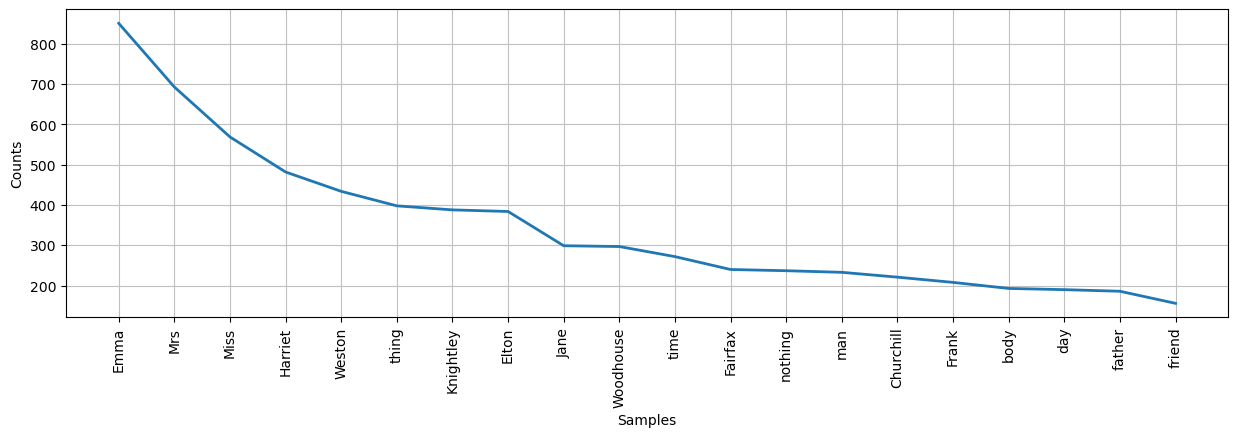

<Axes: xlabel='Samples', ylabel='Counts'>

In [140]:
# 최빈단어 시각화
import matplotlib.pyplot as plt
from nltk import Text
# Text : 단어 리스트와 빈도 분석에서 사용될 클래스
emma_text = Text(word_list)
plt.figure(figsize=(15, 4))
emma_text.plot(20)

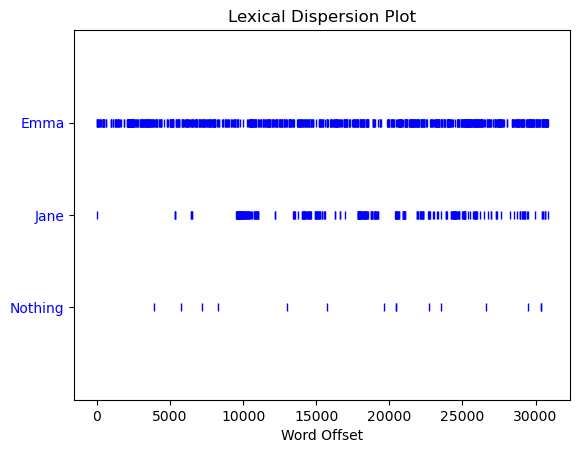

In [141]:
emma_text.dispersion_plot(['Emma','Jane','Nothing'])

In [149]:
# 고유명사(이름) 출현 빈도
name_list = [emma_tag[0] for emma_tag in noun_list if emma_tag[1] in ['NNP','NNPS']]

freq_dict = {}
for name in name_list:
    if name in freq_dict.keys():
        freq_dict[name] += 1
    else:
        freq_dict[name] = 1
freq_dict

{'Emma': 812,
 'Jane': 295,
 'Austen': 1,
 'VOLUME': 3,
 'CHAPTER': 4,
 'Woodhouse': 294,
 'Miss': 569,
 'Taylor': 48,
 'Between': 2,
 '_them_': 1,
 'Sorrow': 1,
 'Weston': 434,
 'Isabella': 60,
 'Mrs': 690,
 'London': 45,
 'October': 4,
 'November': 5,
 'Hartfield': 154,
 'Christmas': 11,
 'Highbury': 117,
 'Matrimony': 1,
 'Poor': 30,
 'James': 19,
 'Randalls': 76,
 'Hannah': 2,
 'Knightley': 388,
 'Brunswick': 11,
 'Square': 11,
 'Dirty': 1,
 'Tis': 2,
 '_one_': 3,
 '_you_': 5,
 'Well': 33,
 'Dear': 17,
 'Pray': 14,
 'Broadway': 1,
 'Lane': 6,
 'Farmer': 1,
 'Mitchell': 1,
 'Elton': 370,
 'Invite': 2,
 'Depend': 10,
 'Captain': 3,
 'Churchill': 218,
 'Yorkshire': 6,
 'Enscombe': 34,
 'Churchills': 15,
 'means': 1,
 'Frank': 208,
 'Perry': 74,
 'Bates': 143,
 'Perrys': 3,
 'III': 4,
 'Donwell': 48,
 'Abbey': 30,
 'Goddard': 59,
 'Had': 13,
 'School': 1,
 'Boarding': 1,
 'Smith': 89,
 'Harriet': 480,
 'Martin': 81,
 'Serle': 3,
 '_very_': 4,
 'Quick': 1,
 'Martins': 9,
 'Mill': 11,
 '

In [150]:
from nltk import FreqDist
FreqDist(name_list)

FreqDist({'Emma': 812, 'Mrs': 690, 'Miss': 569, 'Harriet': 480, 'Weston': 434, 'Knightley': 388, 'Elton': 370, 'Jane': 295, 'Woodhouse': 294, 'Fairfax': 240, ...})

In [151]:
# 150번 이상 반복되는 이름들만 출력
for name, freq in FreqDist(name_list).items():
    if freq > 150:
        print(name, freq)

Emma 812
Jane 295
Woodhouse 294
Miss 569
Weston 434
Mrs 690
Hartfield 154
Knightley 388
Elton 370
Churchill 218
Frank 208
Harriet 480
Fairfax 240
